In [2]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# GARCH(2,2) Model

$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2}
$$

$$
a_0, a_1 \sim \mathcal{N}(0,1)
$$

$$
\sigma_0 =1, \sigma_1 = 1
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$

In [3]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

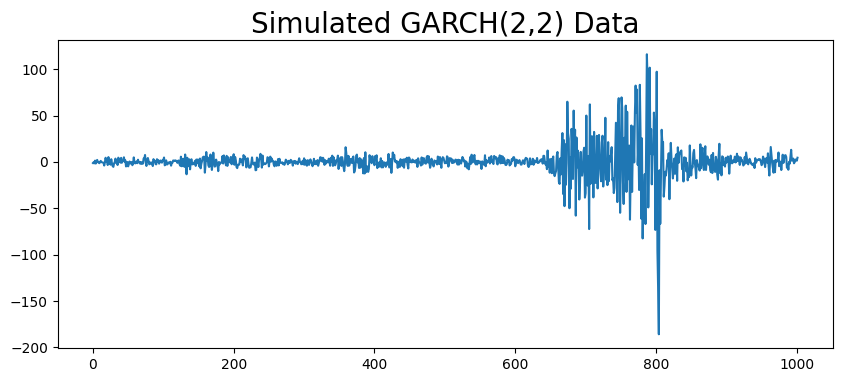

In [7]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

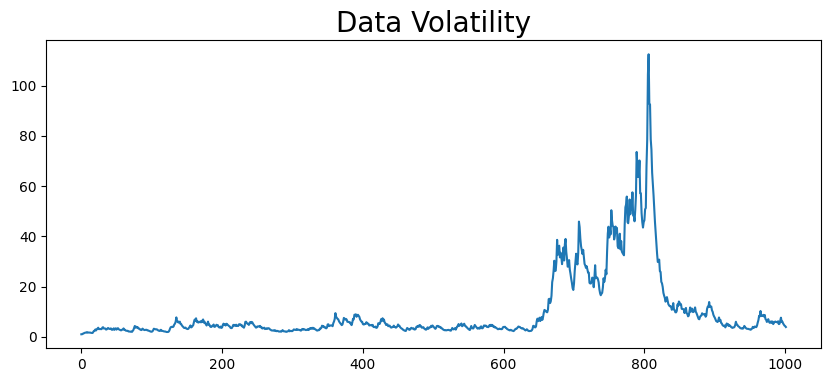

In [5]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

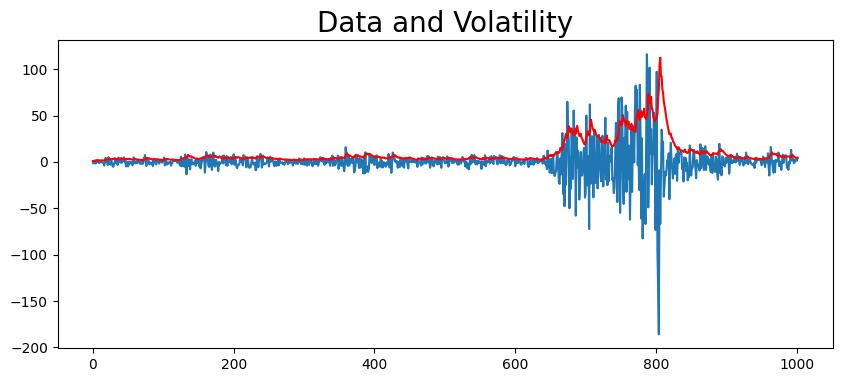

In [8]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

# PACF Plot

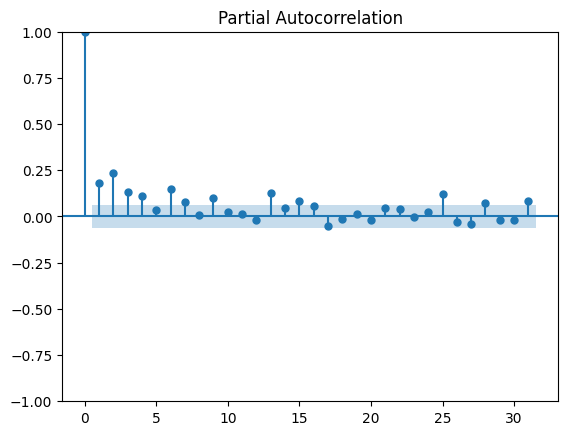

In [9]:
plot_pacf(np.array(series)**2)
plt.show()

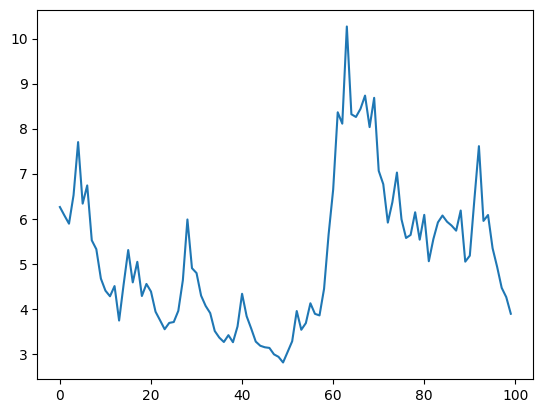

In [9]:
plt.plot(vols[-test_size:])

# Fit the GARCH Model

In [12]:
train, test = series[:-test_size], series[-test_size:]

In [13]:
model = arch_model(train, p=2, q=2)

In [14]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 667790329.3587081
Iteration:      2,   Func. Count:     16,   Neg. LLF: 18376.27881934926
Iteration:      3,   Func. Count:     24,   Neg. LLF: 3803.4445814678893
Iteration:      4,   Func. Count:     32,   Neg. LLF: 3208.4583669072927
Iteration:      5,   Func. Count:     40,   Neg. LLF: 3161.105209614
Iteration:      6,   Func. Count:     48,   Neg. LLF: 3111.833850082634
Iteration:      7,   Func. Count:     56,   Neg. LLF: 2936.413487657823
Iteration:      8,   Func. Count:     64,   Neg. LLF: 2946.074115474188
Iteration:      9,   Func. Count:     72,   Neg. LLF: 2915.833697517607
Iteration:     10,   Func. Count:     79,   Neg. LLF: 2914.183936724113
Iteration:     11,   Func. Count:     86,   Neg. LLF: 2913.7802168016815
Iteration:     12,   Func. Count:     93,   Neg. LLF: 2913.6756212341966
Iteration:     13,   Func. Count:    100,   Neg. LLF: 2913.6446163526525
Iteration:     14,   Func. Count:    107,   Neg. LLF: 2913.642

In [15]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2913.64
Distribution:                  Normal   AIC:                           5839.29
Method:            Maximum Likelihood   BIC:                           5868.11
                                        No. Observations:                  902
Date:                Sun, Feb 16 2025   Df Residuals:                      901
Time:                        01:18:49   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0364      0.118     -0.309      0.758 [ -0.267,  0.194]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.8911      0.299      2.979  2.894e-03   [  0.305,  1.478]
alpha[1]       0.1466  3.101e-02      4.727  2.281e-06 [8.579e-02,  0.207]
alpha[2]       0.2512  3.559e-02      7.059  1.676e-12   [  0.181,  0.321]
beta[1]    8.1247e-14      0.122  6.646e-13      1.000   [ -0.240,  0.240]
beta[2]        0.6022      0.115      5.231  1.682e-07   [  0.377,  0.828]
==========================================================================

Covariance estimator: robust
"""

# Predict

In [20]:
predictions = model_fit.forecast(horizon=test_size)

In [29]:
predicted_volatility = np.sqrt(predictions.variance.values[-test_size:].flatten())

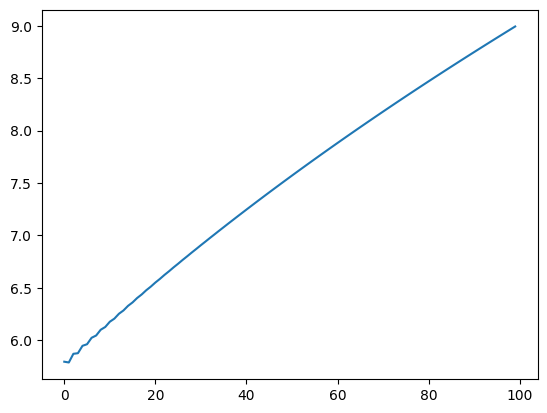

In [30]:
plt.plot(predicted_volatility)

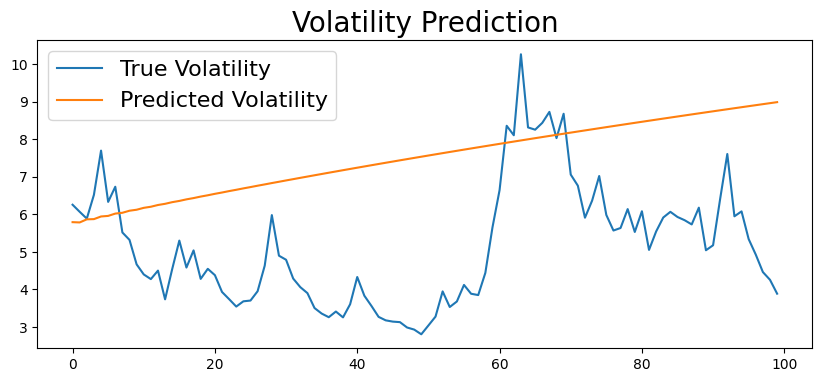

In [32]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

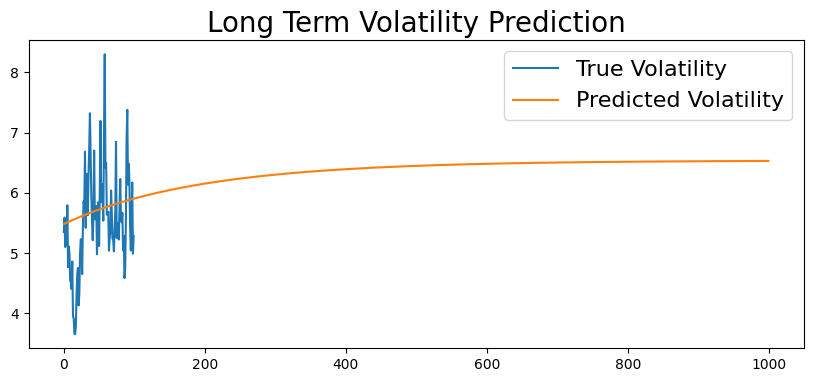

In [16]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

# Rolling Forecast Origin

In [35]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    print(rolling_predictions)

[5.794538807472767]
[5.794538807472767, 5.8122065056277155]
[5.794538807472767, 5.8122065056277155, 5.524373396510642]
[5.794538807472767, 5.8122065056277155, 5.524373396510642, 6.760249574168016]
[5.794538807472767, 5.8122065056277155, 5.524373396510642, 6.760249574168016, 7.735347974907872]
[5.794538807472767, 5.8122065056277155, 5.524373396510642, 6.760249574168016, 7.735347974907872, 5.957891493533327]
[5.794538807472767, 5.8122065056277155, 5.524373396510642, 6.760249574168016, 7.735347974907872, 5.957891493533327, 6.999914510968918]
[5.794538807472767, 5.8122065056277155, 5.524373396510642, 6.760249574168016, 7.735347974907872, 5.957891493533327, 6.999914510968918, 4.775862303981013]
[5.794538807472767, 5.8122065056277155, 5.524373396510642, 6.760249574168016, 7.735347974907872, 5.957891493533327, 6.999914510968918, 4.775862303981013, 5.587812306910124]
[5.794538807472767, 5.8122065056277155, 5.524373396510642, 6.760249574168016, 7.735347974907872, 5.957891493533327, 6.9999145109

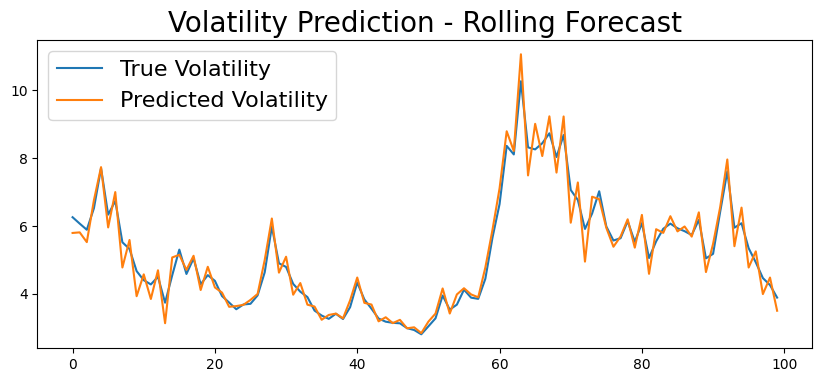

In [36]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model


data = pd.read_csv('/Users/anuragprasad/Documents/btc_eth/data_hr.csv')

In [4]:
data = data.drop(columns=['Unnamed: 0'])

In [ ]:
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)

,open,high,low,close,volume
datetime,,,,,
2019-09-08 17:00:00,10000.00,10000.00,10000.00,10000.00,0.002
2019-09-08 18:00:00,10000.00,10000.00,10000.00,10000.00,0.000
2019-09-08 19:00:00,10344.77,10357.53,10337.43,10340.12,471.659
2019-09-08 20:00:00,10340.12,10368.64,10334.54,10351.42,583.271
2019-09-08 21:00:00,10351.42,10391.90,10324.77,10391.90,689.759
...,...,...,...,...,...
2023-12-31 20:00:00,42659.90,42724.50,42543.30,42599.10,4730.936
2023-12-31 21:00:00,42599.20,42717.00,42558.20,42558.90,3794.010
2023-12-31 22:00:00,42559.00,42629.50,42111.90,42294.80,11952.346


In [11]:

data['log_return'] = np.log(data['close']).diff().dropna()

returns = data['log_return'].dropna()

test_size = int(len(returns) * 0.1)
train, test = returns[:-test_size], returns[-test_size:]

model = arch_model(train, p=2, q=2)
model_fit = model.fit()
print(model_fit.summary())

Iteration:      1,   Func. Count:      8,   Neg. LLF: 4.796752616443218e+23
Iteration:      2,   Func. Count:     24,   Neg. LLF: 608461051481541.8
Iteration:      3,   Func. Count:     41,   Neg. LLF: 1.950964710896014e+27
Iteration:      4,   Func. Count:     58,   Neg. LLF: 7.372411745005965e+30
Iteration:      5,   Func. Count:     74,   Neg. LLF: 143045.68498404857
Inequality constraints incompatible    (Exit mode 4)
            Current function value: 143045.6862116764
            Iterations: 5
            Function evaluations: 74
            Gradient evaluations: 5
                     Constant Mean - GARCH Model Results                      
Dep. Variable:             log_return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -143046.
Distribution:                  Normal   AIC:                           286103.
Method:            Maximum

/opt/anaconda3/envs/py_proj/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.748e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/anaconda3/envs/py_proj/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [15]:
predictions = model_fit.forecast(horizon=test_size)
predicted_volatility = np.sqrt(predictions.variance.values[-1, :])


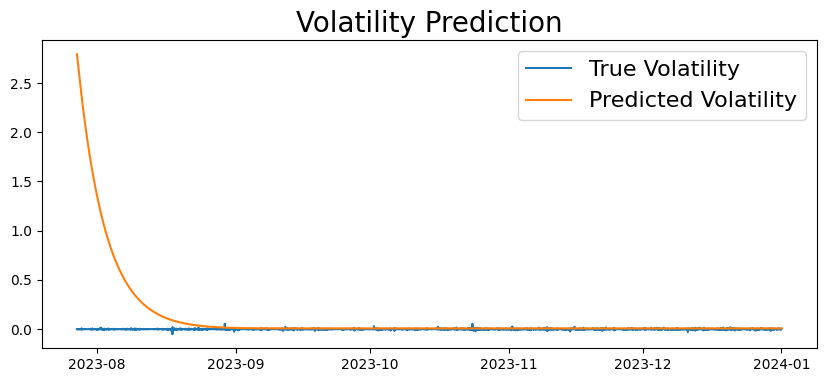

In [16]:
plt.figure(figsize=(10, 4))
true_volatility, = plt.plot(test.index, test)
predicted_volatility_plot, = plt.plot(test.index, predicted_volatility, label='Predicted Volatility')
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)
plt.show()

/opt/anaconda3/envs/py_proj/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.748e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/anaconda3/envs/py_proj/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/opt/anaconda3/envs/py_proj/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.747e-05. Parameter
estimation work better

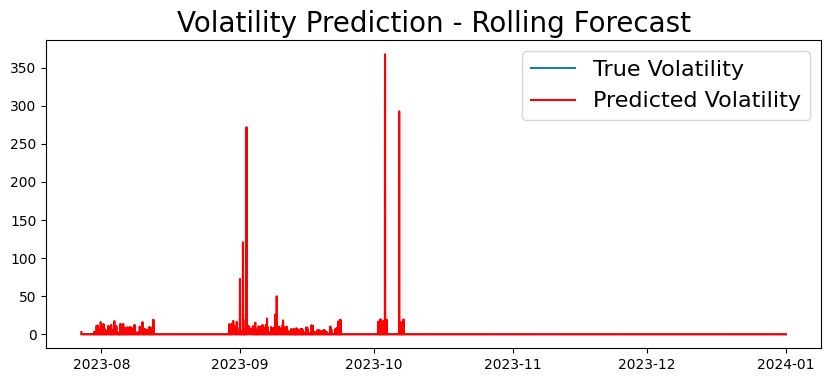

In [20]:
rolling_predictions = []
for i in range(test_size):
    train_data = returns[:-(test_size - i)]
    model = arch_model(train_data, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1, 0]))

# Convert rolling predictions to a pandas Series
rolling_predictions = pd.Series(rolling_predictions, index=test.index)

# Plot the true and predicted volatility using rolling forecast
plt.figure(figsize=(10, 4))
true_volatility, = plt.plot(test.index, test, label='True Volatility')
predicted_volatility_plot, = plt.plot(rolling_predictions.index, rolling_predictions, label='Predicted Volatility', color='red')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(fontsize=16)
plt.show()